<a href="https://colab.research.google.com/github/lurndatascience/DeepLearning/blob/main/ANN_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

In [ ]:
def build_train_model(x,y):
  # build model
  ANNreg = nn.Sequential(
    nn.Linear(1,1),  # input layer
    nn.ReLU(),       # activation function
    nn.Linear(1,1)   # output layer
    )
  ANNreg

  # learning rate
  learningRate = .05

  # loss function
  lossfun = nn.MSELoss()

  # optimizer (the flavor of gradient descent to implement)
  optimizer = torch.optim.SGD(ANNreg.parameters(),lr=learningRate)


  # train the model
  numepochs = 500
  losses = torch.zeros(numepochs)


  ## Train the model!
  for epochi in range(numepochs):

    # forward pass
    yHat = ANNreg(x)

    # compute loss
    loss = lossfun(yHat,y)
    losses[epochi] = loss

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # final forward pass
    final_predictions = ANNreg(x)


  return final_predictions,losses.detach()

In [ ]:
# create data
def create_data(m):
  N = 30
  x = torch.randn(N,1)
  y = m*x + torch.randn(N,1)/2
  return x,y

In [ ]:
slopes = torch.linspace(start=-2,end=2,steps=21)
result_pred = []
result_losses = []
for i in range(50):
  m = slopes[np.random.randint(low = 0, high=21)]
  # Create the data for 50 times
  x,y = create_data(m)
  prediction, final_loss = build_train_model(x,y)
  result_pred.append(prediction)
  result_losses.append( final_loss )

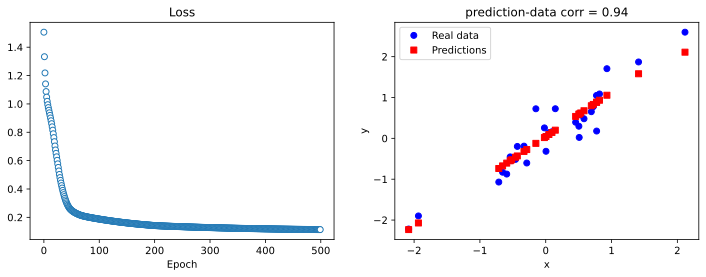

In [ ]:
# create a dataset
x,y = create_data(1)

# run the model
yHat,losses = build_train_model(x,y)

fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
ax[0].set_xlabel('Epoch')
ax[0].set_title('Loss')

ax[1].plot(x,y,'bo',label='Real data')
ax[1].plot(x,yHat.detach(),'rs',label='Predictions')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title(f'prediction-data corr = {np.corrcoef(y.T,yHat.detach().T)[0,1]:.2f}')
ax[1].legend()

plt.show()

In [ ]:
slopes = np.linspace(-2,2,21)

numExps = 50

# initialize output matrix
results = np.zeros((len(slopes),numExps,2))

for slopei in range(len(slopes)):

  for N in range(numExps):
  
    # create a dataset and run the model
    x,y = create_data(slopes[slopei])
    yHat,losses = build_train_model(x,y)

    # store the final loss and performance
    results[slopei,N,0] = losses[-1]
    results[slopei,N,1] = np.corrcoef(y.T,yHat.detach().T)[0,1]


# correlation can be 0 if the model didn't do well. Set nan's->0
results[np.isnan(results)] = 0

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


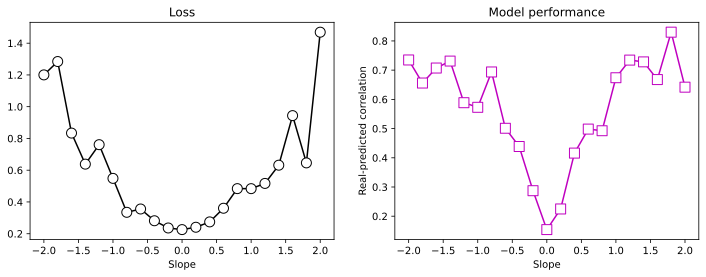

In [ ]:
# plot the results!

fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(slopes,np.mean(results[:,:,0],axis=1),'ko-',markerfacecolor='w',markersize=10)
ax[0].set_xlabel('Slope')
ax[0].set_title('Loss')

ax[1].plot(slopes,np.mean(results[:,:,1],axis=1),'ms-',markerfacecolor='w',markersize=10)
ax[1].set_xlabel('Slope')
ax[1].set_ylabel('Real-predicted correlation')
ax[1].set_title('Model performance')

plt.show()

In [ ]:
# So the conclusion is you don't always have to use DL for results. You can go
# for simple yet effective ML algorithms.